<Axes: xlabel='Conductivity ($S/m$)', ylabel='Depth (m)'>

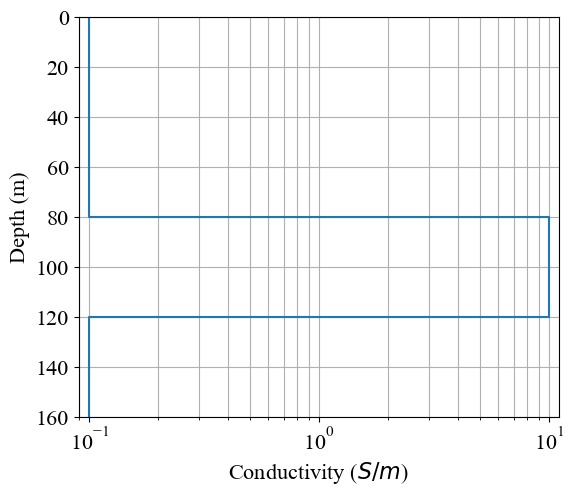

In [28]:
import numpy as np
import os
from matplotlib import pyplot as plt
from SimPEG import maps
import SimPEG.electromagnetics.time_domain as tdem
from SimPEG.utils import plot_1d_layer_model
write_output = False
plt.rcParams.update({"font.size": 16})
source_location = np.array([0.0, 0.0, 1.0])
source_orientation = "z" 
source_current = 2.0  
source_radius = 10.0 
receiver_location = np.array([0.0, 0.0, 1.0])
receiver_orientation = "z"  # "x", "y" or "z"
times = np.logspace(-5, -2, 31)  # time channels (s)
receiver_list = []
receiver_list.append(
    tdem.receivers.PointMagneticFluxDensity(
        receiver_location, times, orientation=receiver_orientation
    )
)
waveform = tdem.sources.StepOffWaveform()
source_list = [
    tdem.sources.CircularLoop(
        receiver_list=receiver_list,
        location=source_location,
        waveform=waveform,
        current=source_current,
        radius=source_radius,
    )
]
survey = tdem.Survey(source_list)
background_conductivity = 0.1
layer_conductivity = 10
thicknesses = np.array([40.0, 40.0, 40])
n_layer = len(thicknesses) + 1
model = background_conductivity * np.ones(n_layer)
model[2] = layer_conductivity
model_mapping = maps.IdentityMap(nP=n_layer)
thicknesses_for_plotting = np.r_[thicknesses, 40.0]
fig = plt.figure(figsize=(6, 5))
rcParams["font.family"] = "Times New Roman"
ax = fig.add_axes([0.15, 0.15, 0.8, 0.8])
plot_1d_layer_model(thicknesses_for_plotting, model, ax=ax,scale="log", show_layers=False)
ax.grid(which="both")
ax.set_xlabel(r"Conductivity ($S/m$)")
plt.gca()

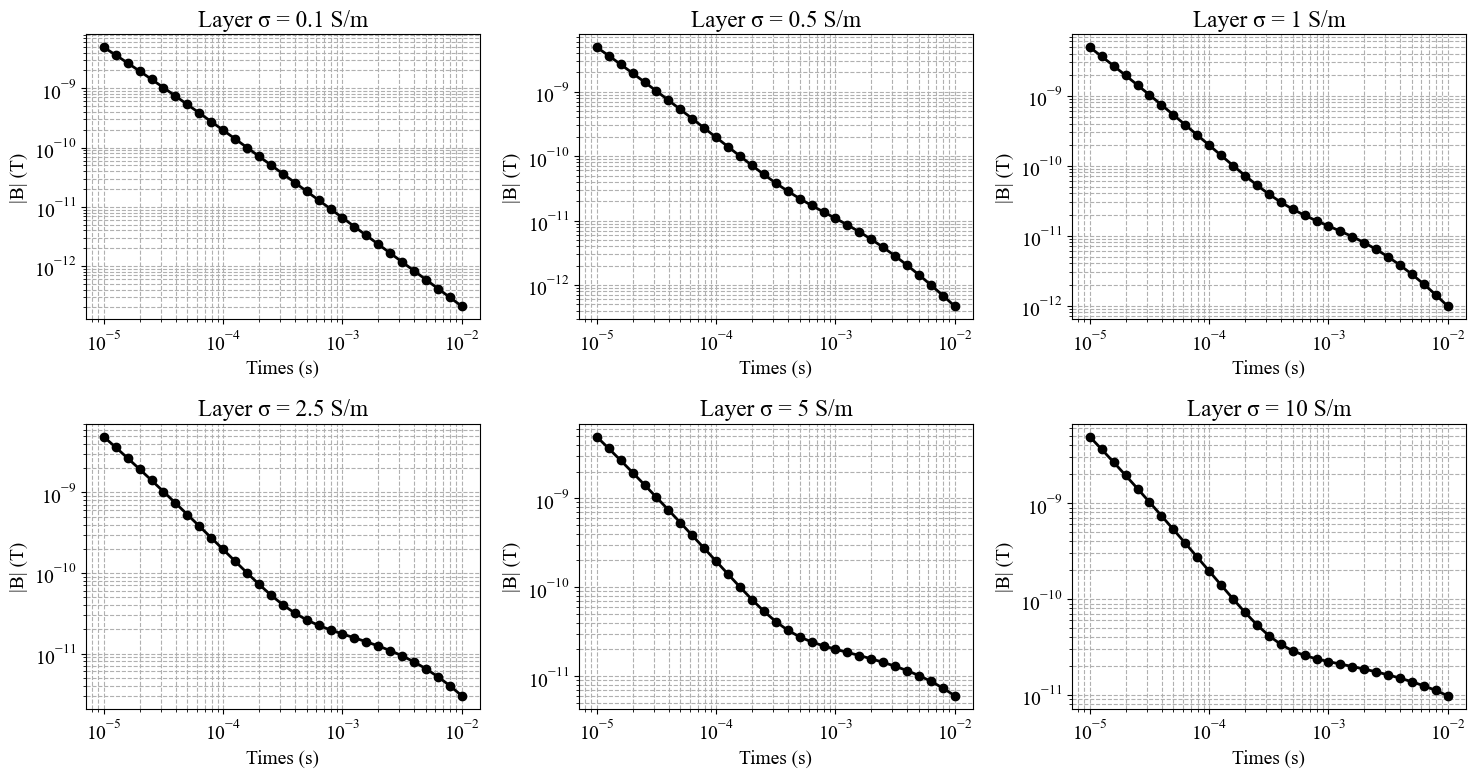

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from SimPEG import maps
import SimPEG.electromagnetics.time_domain as tdem

plt.rcParams.update({"font.size": 14, "font.family": "Times New Roman"})

# Source and receiver
source_location = np.array([0.0, 0.0, 1.0])
source_current = 2.0
source_radius = 10.0
receiver_location = np.array([0.0, 0.0, 1.0])
times = np.logspace(-5, -2, 31)

receiver_list = [tdem.receivers.PointMagneticFluxDensity(receiver_location, times, orientation="z")]
waveform = tdem.sources.StepOffWaveform()
source_list = [tdem.sources.CircularLoop(receiver_list=receiver_list,
                                         location=source_location,
                                         waveform=waveform,
                                         current=source_current,
                                         radius=source_radius)]
survey = tdem.Survey(source_list)
background_conductivity = 0.1
thicknesses = np.array([40.0, 40.0, 40.0])
n_layer = len(thicknesses) + 1
model_mapping = maps.IdentityMap(nP=n_layer)
layer_conductivities = [0.1, 0.5, 1, 2.5, 5, 10]
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, layer_conductivity in enumerate(layer_conductivities):
    model = background_conductivity * np.ones(n_layer)
    model[2] = layer_conductivity
    simulation = tdem.Simulation1DLayered(
        survey=survey,
        thicknesses=thicknesses,
        sigmaMap=model_mapping,
    )
    dpred = simulation.dpred(model)
    ax = axes[i]
    ax.loglog(times, dpred, "k-o", lw=2)
    ax.set_xlabel("Times (s)")
    ax.set_ylabel("|B| (T)")
    ax.set_title(f"Layer σ = {layer_conductivity} S/m")
    ax.grid(True, which="both", linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()


As the conductivity of the third layer increases, the TDEM response shows a slower decay and higher late-time amplitudes. This means that more conductive layers support stronger and longer-lasting eddy currents, which keep the magnetic flux from decaying quickly.